In [1]:
import scipy

In [2]:
help(scipy)

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import. For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     li

In [4]:
from pathlib import Path
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq

In [7]:
help(Path)

Help on class Path in module pathlib:

class Path(PurePath)
 |  Path(*args, **kwargs)
 |  
 |  PurePath subclass that can make system calls.
 |  
 |  Path represents a filesystem path but unlike PurePath, also offers
 |  methods to do system calls on path objects. Depending on your system,
 |  instantiating a Path will return either a PosixPath or a WindowsPath
 |  object. You can also instantiate a PosixPath or WindowsPath directly,
 |  but cannot instantiate a WindowsPath on a POSIX system or vice versa.
 |  
 |  Method resolution order:
 |      Path
 |      PurePath
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, t, v, tb)
 |  
 |  absolute(self)
 |      Return an absolute version of this path.  This function works
 |      even if the path doesn't point to anything.
 |      
 |      No normalization is done, i.e. all '.' and '..' will be kept along.
 |      Use resolve() to get the canonical path to a file.
 |  
 |  chmod(self,

In [11]:
data = Path("smsspamcollection/SMSSpamCollection").read_text()
data = data.strip()
data = data.split("\n")
data

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cl

In [12]:
digit_counts = np.empty((len(data), 2), dtype=int)
digit_counts

array([[7381153972731540340, 7863404115024636262],
       [ 733635283998962533, 7309464687847760232],
       [2338326355447936032, 7810780110020044151],
       ...,
       [8391739242906989344, 7022907665914536041],
       [2333271926466699630, 8386102102963989813],
       [3900238641945079661, 8391723850284487213]])

### create an array where column one is "spam or not span" and column 2 it the number of digits in the message

In [14]:
for i, line in enumerate(data):
    case, message = line.split("\t")
    num_digits = sum(char.isdigit() for char in message)
    digit_counts[i,0] = 0 if case == "ham" else 1
    digit_counts[i,1] = num_digits
    
digit_counts

array([[ 0,  0],
       [ 0,  0],
       [ 1, 25],
       ...,
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]])

### create an array where one column is the number of digits in the message and another column is how many messages there are with that number of digits

In [25]:
# tuple of arrays
unique_counts = np.unique(digit_counts[:, 1], return_counts=True)
unique_counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 40, 41, 47]),
 array([4110,  486,  160,   78,   42,   39,   16,   14,   28,   17,   16,
          34,   30,   31,   37,   29,   35,   33,   41,   47,   18,   31,
          28,   36,   34,   16,   16,   13,   19,    9,    2,    6,    3,
           4,    3,    4,    1,    1,    4,    2,    1]))

In [28]:
# array (2 rows, 41 columns)
unique_counts = np.vstack(unique_counts)
unique_counts

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   40,   41,   47],
       [4110,  486,  160,   78,   42,   39,   16,   14,   28,   17,   16,
          34,   30,   31,   37,   29,   35,   33,   41,   47,   18,   31,
          28,   36,   34,   16,   16,   13,   19,    9,    2,    6,    3,
           4,    3,    4,    1,    1,    4,    2,    1]])

In [34]:
# transposed (41 rows, 2 columns)
unique_counts = np.transpose(unique_counts)
unique_counts

array([[   0, 4110],
       [   1,  486],
       [   2,  160],
       [   3,   78],
       [   4,   42],
       [   5,   39],
       [   6,   16],
       [   7,   14],
       [   8,   28],
       [   9,   17],
       [  10,   16],
       [  11,   34],
       [  12,   30],
       [  13,   31],
       [  14,   37],
       [  15,   29],
       [  16,   35],
       [  17,   33],
       [  18,   41],
       [  19,   47],
       [  20,   18],
       [  21,   31],
       [  22,   28],
       [  23,   36],
       [  24,   34],
       [  25,   16],
       [  26,   16],
       [  27,   13],
       [  28,   19],
       [  29,    9],
       [  30,    2],
       [  31,    6],
       [  32,    3],
       [  33,    4],
       [  34,    3],
       [  35,    4],
       [  36,    1],
       [  37,    1],
       [  40,    4],
       [  41,    2],
       [  47,    1]])

### Normalize data and apply kmeans

In [35]:
# Normalize
whitened_counts = whiten(unique_counts)
whitened_counts

array([[0.00000000e+00, 6.49364346e+00],
       [8.11755468e-02, 7.67861489e-01],
       [1.62351094e-01, 2.52793906e-01],
       [2.43526640e-01, 1.23237029e-01],
       [3.24702187e-01, 6.63584003e-02],
       [4.05877734e-01, 6.16185146e-02],
       [4.87053281e-01, 2.52793906e-02],
       [5.68228827e-01, 2.21194668e-02],
       [6.49404374e-01, 4.42389335e-02],
       [7.30579921e-01, 2.68593525e-02],
       [8.11755468e-01, 2.52793906e-02],
       [8.92931014e-01, 5.37187050e-02],
       [9.74106561e-01, 4.73988574e-02],
       [1.05528211e+00, 4.89788193e-02],
       [1.13645765e+00, 5.84585908e-02],
       [1.21763320e+00, 4.58188955e-02],
       [1.29880875e+00, 5.52986669e-02],
       [1.37998430e+00, 5.21387431e-02],
       [1.46115984e+00, 6.47784384e-02],
       [1.54233539e+00, 7.42582099e-02],
       [1.62351094e+00, 2.84393144e-02],
       [1.70468648e+00, 4.89788193e-02],
       [1.78586203e+00, 4.42389335e-02],
       [1.86703758e+00, 5.68786288e-02],
       [1.948213

In [38]:
centroids, _ = kmeans(whitened_counts, 3)
centroids

array([[2.52050073, 0.01840656],
       [0.85234324, 0.09724666],
       [0.        , 6.49364346]])

In [39]:
codes, _ = vq(whitened_counts, centroids)
codes

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [40]:
unique_counts

array([[   0, 4110],
       [   1,  486],
       [   2,  160],
       [   3,   78],
       [   4,   42],
       [   5,   39],
       [   6,   16],
       [   7,   14],
       [   8,   28],
       [   9,   17],
       [  10,   16],
       [  11,   34],
       [  12,   30],
       [  13,   31],
       [  14,   37],
       [  15,   29],
       [  16,   35],
       [  17,   33],
       [  18,   41],
       [  19,   47],
       [  20,   18],
       [  21,   31],
       [  22,   28],
       [  23,   36],
       [  24,   34],
       [  25,   16],
       [  26,   16],
       [  27,   13],
       [  28,   19],
       [  29,    9],
       [  30,    2],
       [  31,    6],
       [  32,    3],
       [  33,    4],
       [  34,    3],
       [  35,    4],
       [  36,    1],
       [  37,    1],
       [  40,    4],
       [  41,    2],
       [  47,    1]])

In [42]:
ham_code = codes[0]
spam_code = codes[-1]
unknown_code = list(set(range(3)) ^ set((ham_code, spam_code)))[0]

print("definitely ham:", unique_counts[codes == ham_code][-1])
print("definitely spam:", unique_counts[codes == spam_code][-1])
print("unknown:", unique_counts[codes == unknown_code][-1])

definitely ham: [   0 4110]
definitely spam: [47  1]
unknown: [20 18]


## Check how accurate predicitons are against dataset

In [43]:
digits = digit_counts[:,1]
digits

array([ 0,  0, 25, ...,  0,  0,  0])

In [44]:
predicted_hams = digits == 0
predicted_hams

array([ True,  True, False, ...,  True,  True,  True])

In [45]:
predicted_spams = digits > 20
predicted_spams

array([False, False,  True, ..., False, False, False])

In [46]:
predicted_unknowns = np.logical_and(digits > 0, digits <= 20)
predicted_unknowns

array([False, False, False, ..., False, False, False])

In [47]:
spam_cluster = digit_counts[predicted_spams]
ham_cluster = digit_counts[predicted_hams]
unk_cluster = digit_counts[predicted_unknowns]

In [48]:
print("hams:", np.unique(ham_cluster[:, 0], return_counts=True))
print("spams:", np.unique(spam_cluster[:, 0], return_counts=True))
print("unknowns:", np.unique(unk_cluster[:, 0], return_counts=True))

hams: (array([0, 1]), array([4071,   39]))
spams: (array([0, 1]), array([  1, 232]))
unknowns: (array([0, 1]), array([755, 476]))


## Optimizing

In [50]:
from scipy.optimize import minimize_scalar

In [51]:
def objective_function(x):
    return (3 * x ** 4) - (2 * x) + (1)

In [83]:
minimum = minimize_scalar(objective_function)
minimum

     fun: 0.17451818777634331
    nfev: 16
     nit: 12
 success: True
       x: 0.5503212087491959

In [53]:
from matplotlib import pyplot

In [110]:
def graph_function(func, x1, x2, pts=100):
    xs = np.linspace(x1, x2, pts)
    ys = func(xs)
    
    minimum = minimize_scalar(func)

    fig = pyplot.figure(figsize=(15,9))

    pyplot.plot(xs, ys)
    pyplot.scatter(minimum.x, func(minimum.x), marker="*", color="r", s=200)

    pyplot.show()

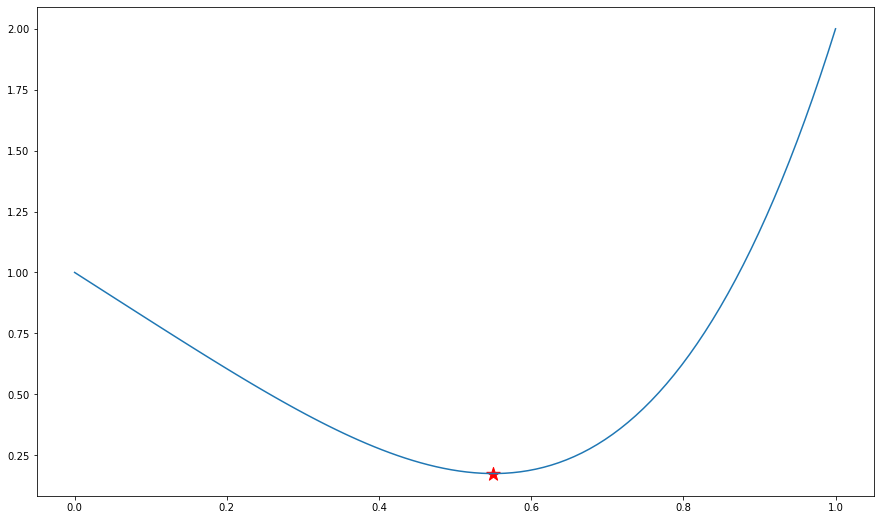

In [111]:
graph_function(objective_function, 0, 1)

In [112]:
def objective_function2(x):
    return (x ** 4) - (x ** 2)

In [113]:
minimum2 = minimize_scalar(objective_function2)
minimum2

     fun: -0.24999999999999994
    nfev: 15
     nit: 11
 success: True
       x: 0.7071067853059209

In [114]:
minimum2 = minimize_scalar(objective_function2, method="bounded", bounds=(-1, 0))
minimum2

     fun: -0.24999999999998732
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: -0.707106701474177

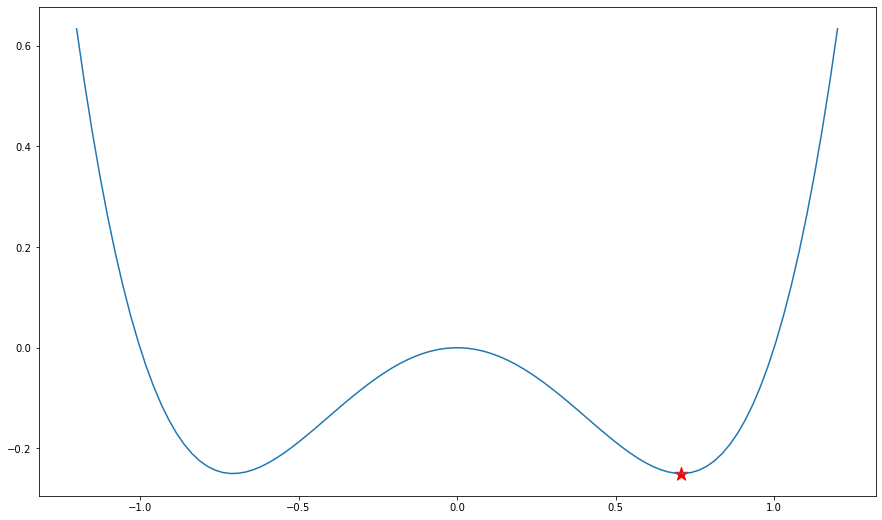

In [115]:
graph_function(objective_function2, -1.2, 1.2)

### Stock selling optimization problem example

In [116]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

In [117]:
n_buyers = 10
n_shares = 15

In [119]:
np.random.seed(10)
prices = np.random.random(n_buyers)
money_available = np.random.randint(1,4,n_buyers)

n_shares_per_buyer = money_available / prices

In [122]:
print(prices, money_available, n_shares_per_buyer, sep="\n\n")

[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084 0.08833981]

[1 1 1 3 1 3 3 2 1 1]

[ 1.29647768 48.18824404  1.57816269  4.00638948  2.00598984 13.34539487
 15.14670609  2.62974258  5.91328161 11.3199242 ]


In [123]:
constraint = LinearConstraint(np.ones(n_buyers), lb=n_shares, ub=n_shares)

In [124]:
constraint

In [125]:
bounds = [(0, n) for n in n_shares_per_buyer]
bounds

[(0, 1.296477682439221),
 (0, 48.18824403823818),
 (0, 1.5781626853523065),
 (0, 4.006389483224008),
 (0, 2.0059898362934296),
 (0, 13.3453948697305),
 (0, 15.146706090719757),
 (0, 2.629742583593113),
 (0, 5.913281610609325),
 (0, 11.31992419669592)]

In [126]:
def objective_function(x, prices):
    return -x.dot(prices)

In [128]:
res = minimize(objective_function,
               x0=10 * np.random.random(n_buyers),
               args=(prices,),
               constraints=constraint,
               bounds=bounds,
              )


In [129]:
res

     fun: -8.783020157087716
     jac: array([-0.77132058, -0.02075195, -0.63364816, -0.74880385, -0.49850702,
       -0.22479665, -0.1980629 , -0.76053071, -0.16911077, -0.08833981])
 message: 'Optimization terminated successfully'
    nfev: 187
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([1.29647768, 0.        , 1.57816269, 4.00638948, 2.00598984,
       3.48323773, 0.        , 2.62974258, 0.        , 0.        ])